<a href="https://colab.research.google.com/github/grlee1128/DS340W/blob/main/DS_340W_Week_1_Code_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rohitrox_healthcare_provider_fraud_detection_analysis_path = kagglehub.dataset_download('rohitrox/healthcare-provider-fraud-detection-analysis')

print('Data source import complete.')

#If this does not connect to kaggle page just download files from that kaggle page

Data source import complete.


In [66]:
#import libraries that needed

#libraries for data manipulation
import numpy as np # linear algebra
import pandas as pd
from datetime import datetime

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Install required package
!pip install category_encoders

#libraries for statistics
from scipy.stats import chi2_contingency

#libraries for modelling
#preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
#machine learning
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#evaluation
from sklearn.metrics import f1_score

#library for preventing warnings
import warnings
warnings.filterwarnings('ignore')


#### Fraud is an illegal transaction that will harm every stakeholder, include consumers and providers. This action can be happened in the Healthcare Industry. Preventing fraud is necessary so they will not get further disadvantages. Based on Excellent in Social Security, in the Republic of Korea, the National Health Insurance Service (NHIS) has developed a fraud detection system based on health care big data, which includes socio-demographic, disease and treatment history variables. (https://ww1.issa.int/analysis/detecting-fraud-health-care-through-emerging-technologies)

#### The ability from data mining and machine learning had been showing its predicting potential of fraud.


## LOAD DATA

In [67]:
# Load Train Dataset

Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("Test_Outpatientdata-1542969243754.csv")


In [130]:
Test_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,2,1,2,2,2,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390


In [69]:
Train_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [70]:
Train_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

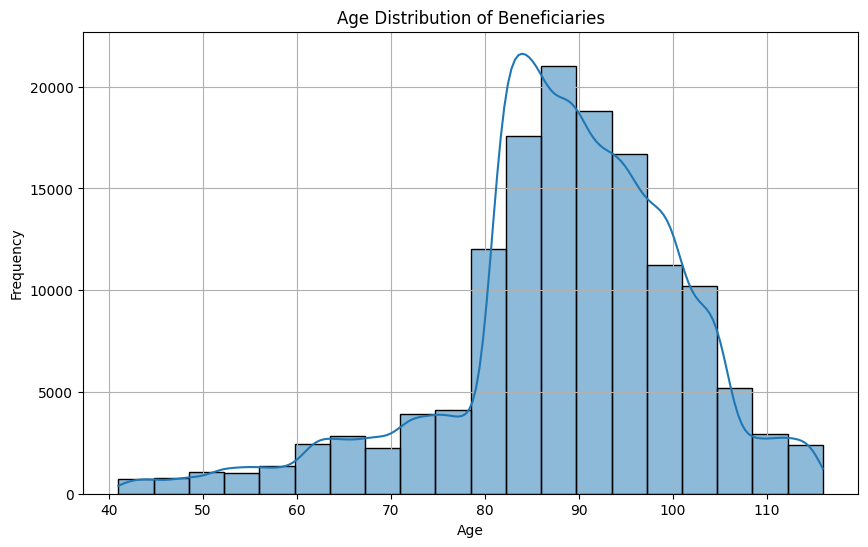

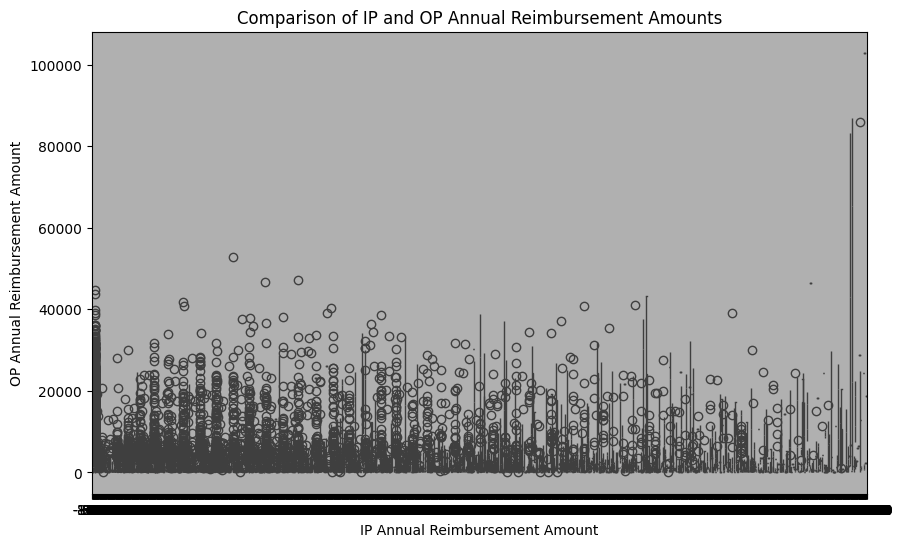

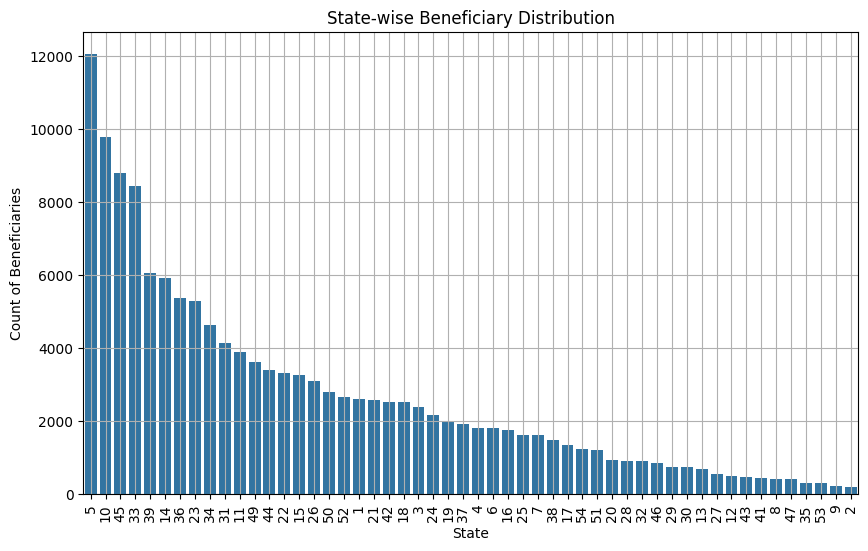

In [129]:
# Convert DOB to datetime format and calculate age
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'], errors='coerce')
Train_Beneficiarydata['Age'] = pd.to_datetime('today') - Train_Beneficiarydata['DOB']
Train_Beneficiarydata['Age'] = Train_Beneficiarydata['Age'].dt.days // 365

# Plot Age Distribution of Beneficiaries
plt.figure(figsize=(10, 6))
sns.histplot(Train_Beneficiarydata['Age'], bins=20, kde=True)
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot Financial Data Analysis (IP vs OP Annual Reimbursement Amounts)
plt.figure(figsize=(10, 6))
sns.boxplot(data=Train_Beneficiarydata, x='IPAnnualReimbursementAmt', y='OPAnnualReimbursementAmt')
plt.title('Comparison of IP and OP Annual Reimbursement Amounts')
plt.xlabel('IP Annual Reimbursement Amount')
plt.ylabel('OP Annual Reimbursement Amount')
plt.grid(True)
plt.show()

# Plot State-wise Beneficiary Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Train_Beneficiarydata, x='State', order=Train_Beneficiarydata['State'].value_counts().index)
plt.title('State-wise Beneficiary Distribution')
plt.xlabel('State')
plt.ylabel('Count of Beneficiaries')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [71]:
## Get information of aligndatasets

print('Info of Train data :')
Train.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Train_Beneficiarydata data :')
Train_Beneficiarydata.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Train_Inpatientdata data :')
Train_Inpatientdata.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Train_Outpatientdata data :')
Train_Outpatientdata.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Test data :')
Test.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Test_Beneficiarydata data :')
Test_Beneficiarydata.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Test_Inpatientdata data :')
Test_Inpatientdata.info()
print('\n------------------------------------------------------------------------------------\n')
print('Info of Test_Outpatientdata data :')
Test_Outpatientdata.info()

Info of Train data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

------------------------------------------------------------------------------------

Info of Train_Beneficiarydata data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-

# Get training Data

In [72]:
#merge all training data.
df_train = Train.merge(Train_Inpatientdata, how = 'left', on = 'Provider')
df_train = df_train.merge(Train_Outpatientdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])
df_train = df_train.merge(Train_Beneficiarydata, how = 'left', on = 'BeneID')

In [73]:
df_train.shape

(43792, 79)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43792 entries, 0 to 43791
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider                         43792 non-null  object 
 1   PotentialFraud                   43792 non-null  object 
 2   BeneID                           40474 non-null  object 
 3   ClaimID                          40474 non-null  object 
 4   ClaimStartDt_x                   40474 non-null  object 
 5   ClaimEndDt_x                     40474 non-null  object 
 6   InscClaimAmtReimbursed_x         40474 non-null  float64
 7   AttendingPhysician_x             40362 non-null  object 
 8   OperatingPhysician_x             23830 non-null  object 
 9   OtherPhysician_x                 4690 non-null   object 
 10  AdmissionDt                      40474 non-null  object 
 11  ClmAdmitDiagnosisCode_x          40474 non-null  object 
 12  DeductibleAmtPaid_

# Add Num of Claims Features

In [75]:
# Assign claim to 1 and null claim to 0
df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].where(~df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].notna(), 1)
df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].where(df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].notna(), 0)

#change type of columns from string into int
df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_train[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(df_train)):
    claim_diagnose.append(df_train['ClmDiagnosisCode_1_x'][i]+ df_train['ClmDiagnosisCode_2_x'][i]+ df_train['ClmDiagnosisCode_3_x'][i]+ df_train['ClmDiagnosisCode_4_x'][i]+ df_train['ClmDiagnosisCode_5_x'][i]+ df_train['ClmDiagnosisCode_6_x'][i]+ df_train['ClmDiagnosisCode_7_x'][i]+df_train['ClmDiagnosisCode_8_x'][i]+  df_train['ClmDiagnosisCode_9_x'][i]+ df_train['ClmDiagnosisCode_10_x'][i])

#Put into a column.
df_train['num_claim_diagnose_in'] = claim_diagnose

#drop columns of claim code.
df_train.drop(columns = ['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x'], axis = 1, inplace = True)

In [76]:
# Assign claim to 1 and null claim to 0
df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].where(~df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].notna(), 1)
df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].where(df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].notna(), 0)

#change type of columns from string into int
df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_train[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(df_train)):
    claim_diagnose.append(df_train['ClmDiagnosisCode_1_y'][i]+ df_train['ClmDiagnosisCode_2_y'][i]+ df_train['ClmDiagnosisCode_3_y'][i]+ df_train['ClmDiagnosisCode_4_y'][i]+ df_train['ClmDiagnosisCode_5_y'][i]+ df_train['ClmDiagnosisCode_6_y'][i]+ df_train['ClmDiagnosisCode_7_y'][i]+df_train['ClmDiagnosisCode_8_y'][i]+  df_train['ClmDiagnosisCode_9_y'][i]+ df_train['ClmDiagnosisCode_10_y'][i])

#Put into a column.
df_train['num_claim_diagnose_out'] = claim_diagnose

#drop columns of claim code.
df_train.drop(columns = ['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y'], axis = 1, inplace = True)

In [77]:
# Assign claim to 1 and null claim to 0
df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].where(~df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].notna(), 1)
df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].where(df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].notna(), 0)

#change type of columns from string into int
df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_train[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(df_train)):
    claim_procedure.append(df_train['ClmProcedureCode_1_x'][i]+ df_train['ClmProcedureCode_2_x'][i]+ df_train['ClmProcedureCode_3_x'][i]+ df_train['ClmProcedureCode_4_x'][i]+ df_train['ClmProcedureCode_5_x'][i])

#Put into a column.
df_train['num_claim_procedure_in'] = claim_procedure

#drop columns of claim code.
df_train.drop(columns = ['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x'], axis = 1, inplace = True)

In [78]:
# Assign claim to 1 and null claim to 0
df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].where(~df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].notna(), 1)
df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].where(df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].notna(), 0)

#change type of columns from string into int
df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_train[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(df_train)):
    claim_procedure.append(df_train['ClmProcedureCode_1_y'][i]+ df_train['ClmProcedureCode_2_y'][i]+ df_train['ClmProcedureCode_3_y'][i]+ df_train['ClmProcedureCode_4_y'][i]+ df_train['ClmProcedureCode_5_y'][i])

#Put into a column.
df_train['num_claim_procedure_out'] = claim_procedure

#drop columns of claim code.
df_train.drop(columns = ['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y'], axis = 1, inplace = True)

# Map Attending columns

#### Attending Physician, Operating Physician, and Other Physician

In [79]:
df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].where(~df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].notna(), 1)
df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].where(df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].notna(), 0)
df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].where(~df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].notna(), 1)
df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].where(df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].notna(), 0)

df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_train[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].astype('int64')
df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_train[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].astype('int64')

# Mapping Chronic Disease Columns

In [80]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

df_train = df_train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)


# Groupby Provider and Potential Fraud

In [81]:
df_train = df_train.groupby(['Provider', 'PotentialFraud'],as_index=False).agg('sum')
df_train.drop(columns = ['Gender', 'Race', 'State', 'County'], inplace = True, axis = 1)


# Rename Rest of Inpatient Data Columns

In [82]:
#Assign template to rename columns.
name = []
temp = []
for column in df_train.columns:
    if column[-2:] == '_x':
        name.append(column)
        temp.append(column[:-2] + '_In')

In [83]:
# Rename column based on template.
for i in range(len(name)):
    df_train=df_train.rename(columns = {name[i]:temp[i]})

In [84]:
#Assign template to rename columns.
name = []
temp = []
for column in df_train.columns:
    if column[-2:] == '_y':
        name.append(column)
        temp.append(column[:-2] + '_Out')

In [85]:
# Rename column based on template.
for i in range(len(name)):
    df_train=df_train.rename(columns = {name[i]:temp[i]})

In [86]:
pd.set_option('display.max_columns', None)

print('Describe Stats of New Train data :')

df_train.describe(include = 'all')


Describe Stats of New Train data :


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_In,ClaimEndDt_In,InscClaimAmtReimbursed_In,AttendingPhysician_In,OperatingPhysician_In,OtherPhysician_In,AdmissionDt,ClmAdmitDiagnosisCode_In,DeductibleAmtPaid_In,DischargeDt,DiagnosisGroupCode,ClmProcedureCode_6_In,ClaimStartDt_Out,ClaimEndDt_Out,InscClaimAmtReimbursed_Out,AttendingPhysician_Out,OperatingPhysician_Out,OtherPhysician_Out,ClmProcedureCode_6_Out,DeductibleAmtPaid_Out,ClmAdmitDiagnosisCode_Out,DOB,DOD,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_claim_diagnose_in,num_claim_diagnose_out,num_claim_procedure_in,num_claim_procedure_out
count,5410,5410,5410.0,5410.0,5410.0,5410.0,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.0,5410.0,5410.000000,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.0,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5.410000e+03,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.0,5410.000000,5410.0
unique,5410,2,2093.0,2093.0,2047.0,2049.0,NaN,NaN,NaN,NaN,2047.0,2004.0,NaN,2049.0,2057.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2055.0,51.0,1121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PRV57763,No,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4904,3318.0,3318.0,3318.0,3318.0,NaN,NaN,NaN,NaN,3318.0,3318.0,NaN,3318.0,3318.0,NaN,5410.0,5410.0,NaN,NaN,NaN,NaN,NaN,NaN,5410.0,3318.0,5176.0,3318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.547080e+04,7.460628,4.404806,0.866913,NaN,NaN,7812.587800,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,89.143068,89.197227,3.770980,5.400185,4.502033,1.428651,3.584658,3.757301,6.000370,6.409242,2.630129,2.695933,1.270610,1.311376e+05,1.412072e+04,14193.454713,3960.013494,60.504251,0.0,5.488355,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,2.420138e+05,23.641965,13.955132,3.210671,NaN,NaN,24766.139781,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.586097,282.653297,12.181405,17.213936,14.314228,4.706371,11.677111,12.032266,19.040353,20.385941,8.524116,8.791044,4.214568,4.232008e+05,4.534281e+04,47154.788010,13010.426630,191.672703,0.0,17.569195,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.800000e+04,5.000000,3.000000,0.000000,NaN,NaN,5340.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,60.000000,60.00000

# Delete Columns That Only One Value

In [87]:
#Based on descriptive statistics, columns that only one value will be deleted.
deleted = []
for feature in df_train.columns:
    if df_train[feature].nunique() <= 1:
        deleted.append(feature)

df_train = df_train[[i for i in df_train.columns if i not in deleted]]

In [88]:
#check null columns
df_train.isnull().sum()

,0
Provider,0
PotentialFraud,0
BeneID,0
ClaimID,0
ClaimStartDt_In,0
ClaimEndDt_In,0
InscClaimAmtReimbursed_In,0
AttendingPhysician_In,0
OperatingPhysician_In,0
OtherPhysician_In,0


# Exploratory Data Analysis

## How many difference number of attending, operating, and other physician between fraud and not fraud?

In [89]:
for feature in df_train.columns:
    if feature.split('_')[0][-9:] == 'Physician':
        fig = px.histogram(df_train, x=feature, color="PotentialFraud")
        fig.show()

### Fraud and not fraud, mostly, are in the lowest number of attending, operating, and other physician. Even thought, the higher number increasingly change to be not fraud.

## How many difference number of claim between fraud and not fraud?

In [90]:
for feature in df_train.columns:
    if feature[:3] == 'num':
        fig = px.histogram(df_train, x=feature, color="PotentialFraud")
        fig.show()

### Fraud and not fraud, mostly, are in the lowest number of claim. Even thought, the higher number increasingly change to be not fraud.

## How many difference amount between fraud and not fraud?

In [91]:
for feature in ['InscClaimAmtReimbursed_In', 'DeductibleAmtPaid_In']:
    fig = px.histogram(df_train, x=feature, color="PotentialFraud")
    fig.show()

In [92]:
for feature in df_train.columns:
    if feature[-3:] == 'Amt':
        fig = px.histogram(df_train, x=feature, color="PotentialFraud")
        fig.show()

### Fraud and not fraud, mostly, are in the lowest payment. Even thought, the higher amount increasingly change to be not fraud.

## What is the 5 most chronic disseases that fraud and not fraud have?

In [93]:
df_fraud = df_train[df_train['PotentialFraud'] == 'Yes']
for i in df_fraud.columns:
    if i[:11] == 'ChronicCond' :
        print(f'Maximum value of Fraud {i} : {df_fraud[i].max()}')

Maximum value of Fraud ChronicCond_Alzheimer : 280.0
Maximum value of Fraud ChronicCond_Heartfailure : 383.0
Maximum value of Fraud ChronicCond_KidneyDisease : 313.0
Maximum value of Fraud ChronicCond_Cancer : 85.0
Maximum value of Fraud ChronicCond_ObstrPulmonary : 283.0
Maximum value of Fraud ChronicCond_Depression : 261.0
Maximum value of Fraud ChronicCond_Diabetes : 420.0
Maximum value of Fraud ChronicCond_IschemicHeart : 454.0
Maximum value of Fraud ChronicCond_Osteoporasis : 198.0
Maximum value of Fraud ChronicCond_rheumatoidarthritis : 201.0
Maximum value of Fraud ChronicCond_stroke : 85.0


In [94]:
#The fifth chronic conditions based on fraud provider have maximum number more than 281
for feature in df_fraud.columns:
    if feature[:11] == 'ChronicCond' and df_fraud[feature].max() > 281:
        fig = px.histogram(df_train, x=feature, color="PotentialFraud")
        fig.show()

In [95]:
df_not_fraud = df_train[df_train['PotentialFraud'] == 'No']
for i in df_not_fraud.columns:
    if i[:11] == 'ChronicCond' :
        print(f'Maximum value of Not fraud {i} : {df_not_fraud[i].max()}')

Maximum value of Not fraud ChronicCond_Alzheimer : 61.0
Maximum value of Not fraud ChronicCond_Heartfailure : 83.0
Maximum value of Not fraud ChronicCond_KidneyDisease : 80.0
Maximum value of Not fraud ChronicCond_Cancer : 31.0
Maximum value of Not fraud ChronicCond_ObstrPulmonary : 59.0
Maximum value of Not fraud ChronicCond_Depression : 63.0
Maximum value of Not fraud ChronicCond_Diabetes : 97.0
Maximum value of Not fraud ChronicCond_IschemicHeart : 97.0
Maximum value of Not fraud ChronicCond_Osteoporasis : 49.0
Maximum value of Not fraud ChronicCond_rheumatoidarthritis : 43.0
Maximum value of Not fraud ChronicCond_stroke : 21.0


In [96]:
#The fifth chronic conditions based on not fraud provider have maximum number between 63 and 97
for feature in df_not_fraud.columns:
    if feature[:11] == 'ChronicCond' and df_not_fraud[feature].max() >= 63:
        fig = px.histogram(df_train, x=feature, color="PotentialFraud")
        fig.show()

### Chronic diseases between two claims are almost same. The difference is that the depression is only in non fraud while the obstr pulmonary.

# Get test data (Follow same map with train)

In [97]:
#merge all training data.
df_test = Test.merge(Test_Inpatientdata, how = 'left', on = 'Provider')
df_test = df_test.merge(Test_Outpatientdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])
df_test = df_test.merge(Test_Beneficiarydata, how = 'left', on = 'BeneID')

In [98]:
## Add num of claims features

# Assign claim to 1 and null claim to 0
df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].where(~df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].notna(), 1)
df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].where(df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].notna(), 0)

#change type of columns from string into int
df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']] = df_test[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(df_test)):
    claim_diagnose.append(df_test['ClmDiagnosisCode_1_x'][i]+ df_test['ClmDiagnosisCode_2_x'][i]+ df_test['ClmDiagnosisCode_3_x'][i]+ df_test['ClmDiagnosisCode_4_x'][i]+ df_test['ClmDiagnosisCode_5_x'][i]+ df_test['ClmDiagnosisCode_6_x'][i]+ df_test['ClmDiagnosisCode_7_x'][i]+df_test['ClmDiagnosisCode_8_x'][i]+  df_test['ClmDiagnosisCode_9_x'][i]+ df_test['ClmDiagnosisCode_10_x'][i])

#Put into a column.
df_test['num_claim_diagnose_in'] = claim_diagnose

#drop columns of claim code.
df_test.drop(columns = ['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x'], axis = 1, inplace = True)

In [99]:
# Assign claim to 1 and null claim to 0
df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].where(~df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].notna(), 1)
df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].where(df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].notna(), 0)

#change type of columns from string into int
df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']] = df_test[['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(df_test)):
    claim_diagnose.append(df_test['ClmDiagnosisCode_1_y'][i]+ df_test['ClmDiagnosisCode_2_y'][i]+ df_test['ClmDiagnosisCode_3_y'][i]+ df_test['ClmDiagnosisCode_4_y'][i]+ df_test['ClmDiagnosisCode_5_y'][i]+ df_test['ClmDiagnosisCode_6_y'][i]+ df_test['ClmDiagnosisCode_7_y'][i]+df_test['ClmDiagnosisCode_8_y'][i]+  df_test['ClmDiagnosisCode_9_y'][i]+ df_test['ClmDiagnosisCode_10_y'][i])

#Put into a column.
df_test['num_claim_diagnose_out'] = claim_diagnose

#drop columns of claim code.
df_test.drop(columns = ['ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y'], axis = 1, inplace = True)

In [100]:
# Assign claim to 1 and null claim to 0
df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].where(~df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].notna(), 1)
df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].where(df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].notna(), 0)

#change type of columns from string into int
df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']] = df_test[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(df_test)):
    claim_procedure.append(df_test['ClmProcedureCode_1_x'][i]+ df_test['ClmProcedureCode_2_x'][i]+ df_test['ClmProcedureCode_3_x'][i]+ df_test['ClmProcedureCode_4_x'][i]+ df_test['ClmProcedureCode_5_x'][i])

#Put into a column.
df_test['num_claim_procedure_in'] = claim_procedure

#drop columns of claim code.
df_test.drop(columns = ['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x'], axis = 1, inplace = True)

In [101]:
# Assign claim to 1 and null claim to 0
df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].where(~df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].notna(), 1)
df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].where(df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].notna(), 0)

#change type of columns from string into int
df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']] = df_test[['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(df_test)):
    claim_procedure.append(df_test['ClmProcedureCode_1_y'][i]+ df_test['ClmProcedureCode_2_y'][i]+ df_test['ClmProcedureCode_3_y'][i]+ df_test['ClmProcedureCode_4_y'][i]+ df_test['ClmProcedureCode_5_y'][i])

#Put into a column.
df_test['num_claim_procedure_out'] = claim_procedure

#drop columns of claim code.
df_test.drop(columns = ['ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y', 'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y'], axis = 1, inplace = True)

In [102]:
## Mapping attending columns
df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].where(~df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].notna(), 1)
df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].where(df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].notna(), 0)
df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].where(~df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].notna(), 1)
df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].where(df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].notna(), 0)

#Change tipe of columns
df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']] = df_test[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].astype('int64')
df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']] = df_test[['AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y']].astype('int64')

In [103]:
### Mapping chronic dissease columns
##Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1


df_test = df_test.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

In [104]:
#Groupby Provider
df_test = df_test.groupby(['Provider'],as_index=False).agg('sum')
df_test.drop(columns = ['Gender', 'Race', 'State', 'County'], inplace = True, axis = 1)

In [105]:
#rename columns

#Assign template to rename columns.
name = []
temp = []
for column in df_test.columns:
    if column[-2:] == '_x':
        name.append(column)
        temp.append(column[:-2] + '_In')

In [106]:
# Rename column based on template.
for i in range(len(name)):
    df_test=df_test.rename(columns = {name[i]:temp[i]})

In [107]:
#Assign template to rename columns.
name = []
temp = []
for column in df_test.columns:
    if column[-2:] == '_y':
        name.append(column)
        temp.append(column[:-2] + '_Out')

In [108]:
# Rename column based on template.
for i in range(len(name)):
    df_test=df_test.rename(columns = {name[i]:temp[i]})

In [109]:
#Based on descriptive statistics, columns that only one value will be deleted.
deleted = []
for feature in df_test.columns:
    if df_test[feature].nunique() <= 1:
        deleted.append(feature)

df_test = df_test[[i for i in df_test.columns if i not in deleted]]

In [110]:
#check null columns
df_test.isnull().sum()

,0
Provider,0
BeneID,0
ClaimID,0
ClaimStartDt_In,0
ClaimEndDt_In,0
InscClaimAmtReimbursed_In,0
AttendingPhysician_In,0
OperatingPhysician_In,0
OtherPhysician_In,0
AdmissionDt,0


## Advance Feature Selection

In [111]:
## Fill NaN

df_m = df_train.copy()

num_cols = [i for i in df_m.columns if df_m[i].dtypes == 'float64' or df_m[i].dtypes == 'int64']


for i in num_cols:
    df_m[i].fillna(0, inplace=True)

In [112]:
#Select columns using correlation between categorical and numerical data.
df_m["PotentialFraud"] = df_m["PotentialFraud"].map({"Yes" : 1,"No" : 0})
num_cols = num_cols + ["PotentialFraud"]
corr = df_m[num_cols].corr(method='kendall')['PotentialFraud'].reset_index().rename(columns = {'index' : 'feature'})

select_cols = []
for i in corr['feature'].unique():
    if (corr.loc[corr.feature == i, 'PotentialFraud'].values[0] >= 0.01) | (corr.loc[corr.feature == i, 'PotentialFraud'].values[0] <= -0.01):
        select_cols.append(i)
    else:
        continue

In [113]:
len(select_cols)

25

In [114]:
#Use columns to be features of train data.
df_temp = df_train[select_cols]

df_temp = df_temp.loc[:,~df_temp.columns.duplicated()]

## Data Preparation

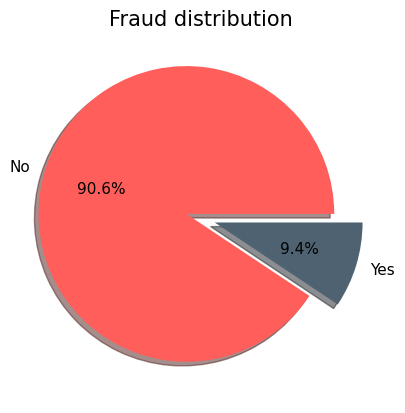

In [115]:
ax = df_temp['PotentialFraud'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['#FF5E5B', '#4F6272'],textprops = {'fontsize':11}).set_title("Fraud distribution",  fontsize = 15)
plt.ylabel('')
plt.show()

plt.show()

In [116]:
#Check data if any null columns
df_temp.isna().sum()

,0
InscClaimAmtReimbursed_In,0
AttendingPhysician_In,0
OperatingPhysician_In,0
OtherPhysician_In,0
DeductibleAmtPaid_In,0
NoOfMonths_PartACov,0
NoOfMonths_PartBCov,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0


In [117]:
# split data into features and target and then train and test.
df_temp["PotentialFraud"] = df_temp["PotentialFraud"].map({"Yes" : 1,"No" : 0})
X_train_val = df_temp.drop(columns = "PotentialFraud")
y_train_val = df_temp["PotentialFraud"]


#Use columns to be features of test data.
select_test = [i for i in select_cols if i != 'PotentialFraud'] + ["Provider"]
test = df_test[select_test]
test = test.loc[:,~test.columns.duplicated()]

id_test = test[["Provider"]]
X_input = test.drop(columns = ["Provider"], axis = 1)


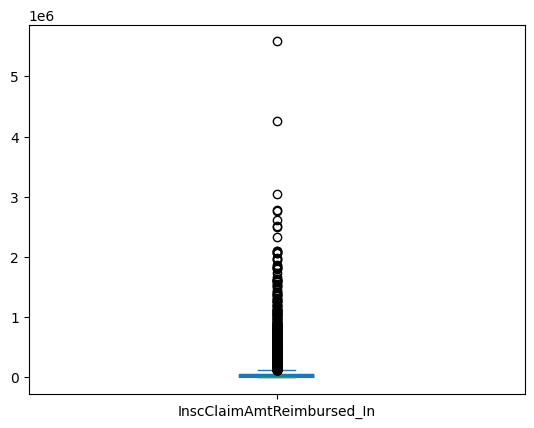

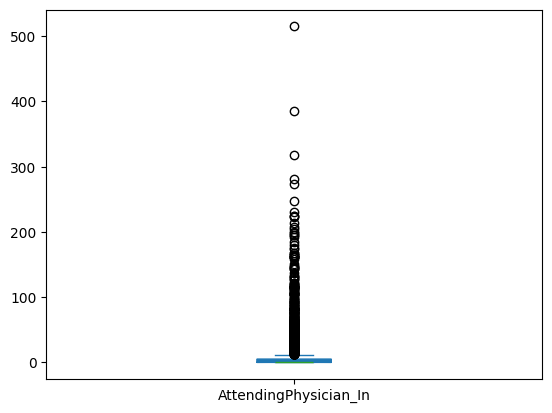

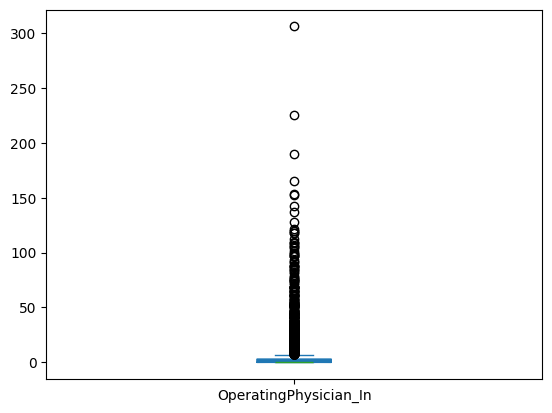

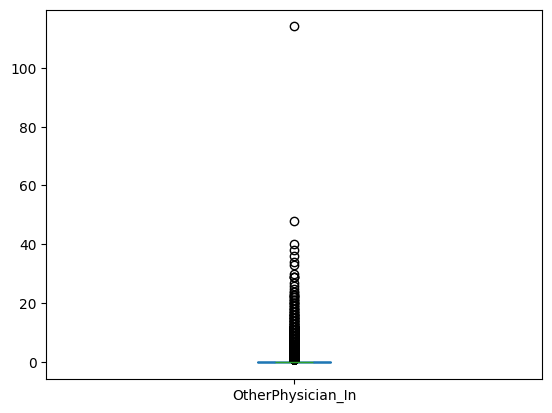

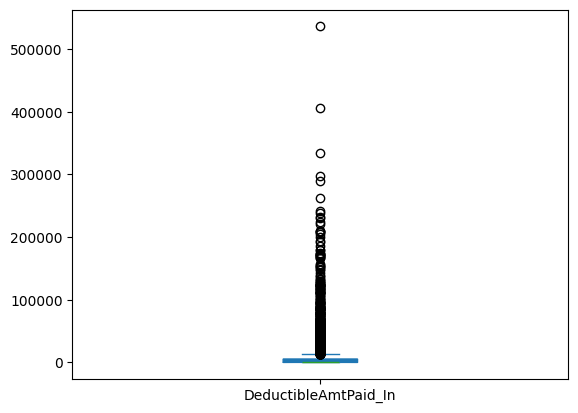

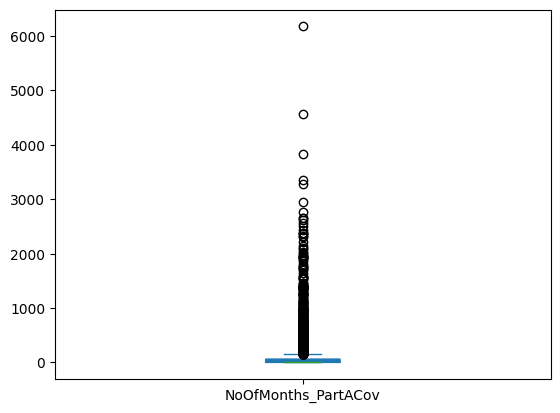

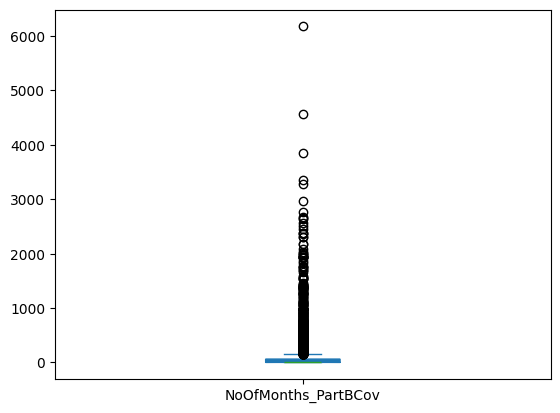

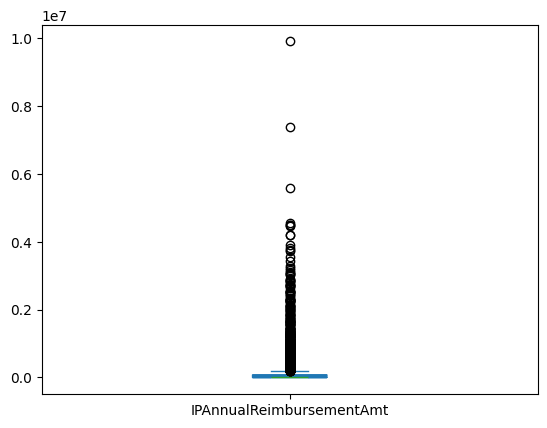

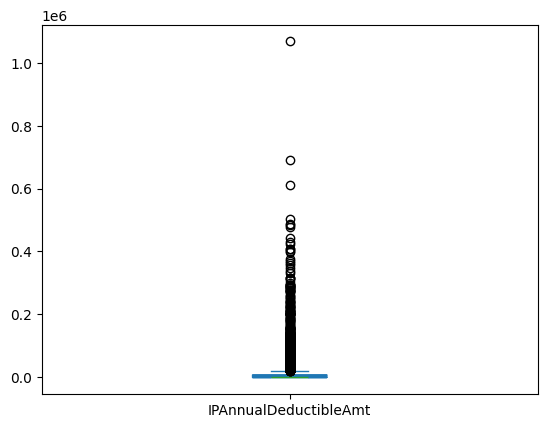

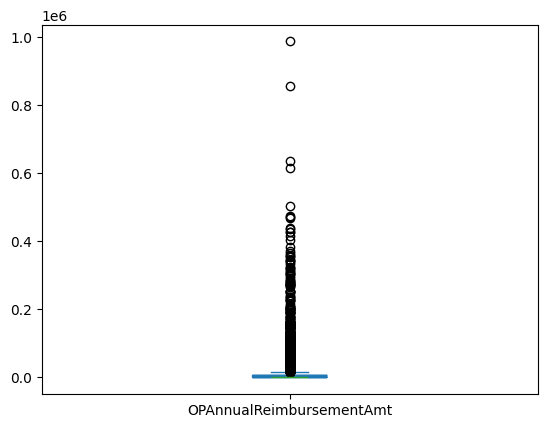

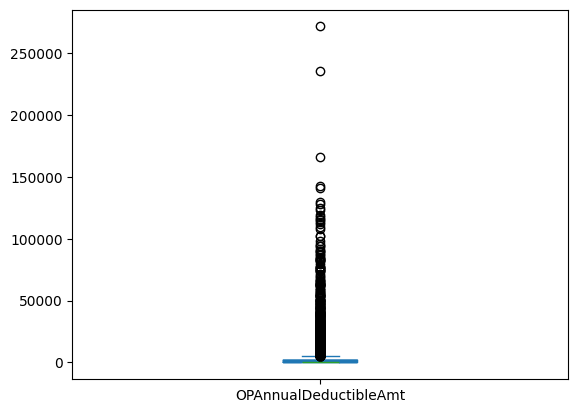

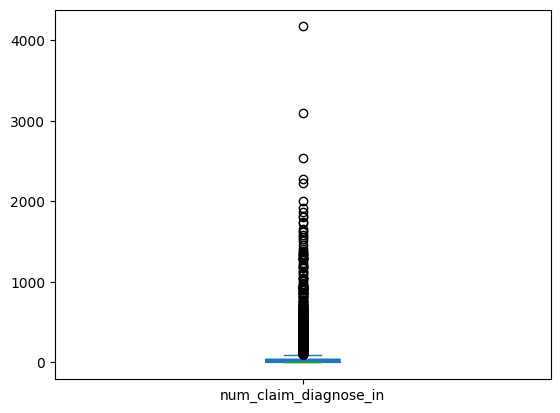

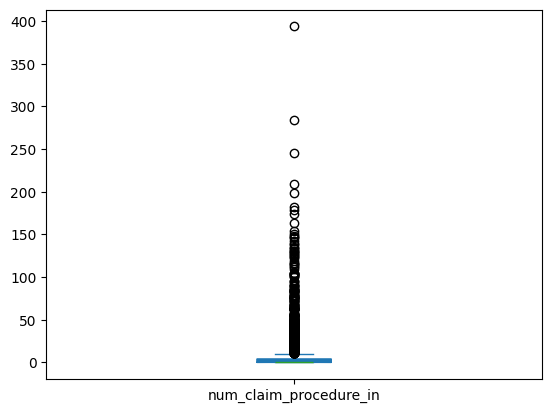

In [118]:
#check outlier

num_cols = [i for i in X_train_val.columns if X_train_val[i].dtypes == 'float64' or X_train_val[i].dtypes == 'int64' if i[:11] != 'ChronicCond']

for feature in df_temp[num_cols]:
    df_temp[feature].plot(kind='box', notch=True, patch_artist=True)
    plt.show();

In [119]:
num_cols = [i for i in X_train_val.columns if X_train_val[i].dtypes == 'float64' or X_train_val[i].dtypes == 'int64']



num_transform = Pipeline([
                                    ("scaler", RobustScaler())
])


prep_pipeline =  ColumnTransformer([
    ('num trans', num_transform, num_cols)
])



# Modeling

# Logistic Regression

In [120]:
model_lr = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy = 'minority')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr',LogisticRegression(random_state = 0))
])

# Random Forest

In [121]:
model_rf = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='not majority')),
    ('rf', RandomForestClassifier(
        random_state=0,
        n_estimators=10,
        max_depth=3,
        max_features='sqrt',
        min_samples_split=10,
        min_samples_leaf=5,
        max_samples=0.5
    ))
])

# Decision Tree

In [122]:
model_dt = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=1, random_state=42)),
    ('dt', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features=None,
        class_weight=None,
        splitter='best',
        random_state=42
    ))
])

# Naive Bayes

In [123]:
model_nb = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=1, random_state=42)),
    ('poly', PolynomialFeatures(degree=1)),
    ('nb', GaussianNB(var_smoothing=1e6))
])

KNN Classification

In [124]:
model_knn = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=1, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

Ensemble Methods (Random Forest, XGBoost, LightGBM)

In [125]:
#Random Forest
model_rf = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='not majority', k_neighbors=1,random_state = 42)),
    ('rf', RandomForestClassifier(
        random_state=0,
        n_estimators=10,
        max_depth=3,
        max_features='sqrt',
        min_samples_split=10
    ))
])

In [126]:
#XGBoost
model_xgb = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='not majority', k_neighbors=1, random_state = 42)),
    ('xgb', XGBClassifier(
        random_state=0,
        n_estimators=100,
        max_depth=10
    ))
])

In [127]:
#LightGBM
model_light = imbpipeline([
    ('prep', prep_pipeline),
    ('smote', SMOTE(sampling_strategy='not majority', k_neighbors=1, random_state = 42)),
    ('lgbm', LGBMClassifier(
        random_state=0,
        n_estimators=100,
        max_depth=10,
        min_gain_to_split= 0.001
    ))
])

# Evaluation

In [128]:
def model_evaluation_cv(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
    avg_accuracy = model_cv.mean()
    return avg_accuracy

print('Accuracy Score Evaluation of Naive Bayes : ', model_evaluation_cv(model_nb, 'accuracy'))
print('Accuracy Score Evaluation of Random Forest : ', model_evaluation_cv(model_rf, 'accuracy'))
print('Accuracy Score Evaluation of Decision Tree : ', model_evaluation_cv(model_dt, 'accuracy'))
print('Accuracy Score Evaluation of Logistic Regression : ', model_evaluation_cv(model_lr, 'accuracy'))
print('Accuracy Score Evaluation of Decision Tree : ', model_evaluation_cv(model_dt, 'accuracy'))
print('Accuracy Score Evaluation of KNN : ', model_evaluation_cv(model_knn, 'accuracy'))
print('Accuracy Score Evaluation of Random Forest : ', model_evaluation_cv(model_rf, 'accuracy'))
print('Accuracy Score Evaluation of XGBoost : ', model_evaluation_cv(model_xgb, 'accuracy'))
print('Accuracy Score Evaluation of LightGBM : ', model_evaluation_cv(model_light, 'accuracy'))

Accuracy Score Evaluation of Naive Bayes :  0.9258780036968577
Accuracy Score Evaluation of Random Forest :  0.8417744916820704
Accuracy Score Evaluation of Decision Tree :  0.9077634011090574
Accuracy Score Evaluation of Logistic Regression :  0.7687615526802218
Accuracy Score Evaluation of Decision Tree :  0.9077634011090574
Accuracy Score Evaluation of KNN :  0.8707948243992606
Accuracy Score Evaluation of Random Forest :  0.8417744916820704
Accuracy Score Evaluation of XGBoost :  0.9173752310536045
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Info] Number of positive: 3923, number of negative: 3923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i